In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dd
import seaborn as sns


In [ ]:
# Data has been cleaned with MS Excel 

In [3]:
Data = pd.read_excel(r"D:\Project\Quuantium\Merged.xlsx")

In [5]:
Data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_Type,PROD_Wt(in Grams),PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Check_LYLTY_CARD_NBR
0,2018-10-17,1,1000,1,5,Natural Chip Co,SeaSalt,175,2,6.0,YOUNG SINGLES/COUPLES,Premium,True
1,2019-05-14,1,1307,348,66,CC's,NachoCheee,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget,True
2,2018-11-10,1,1307,346,96,WW,OriginalStacked,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget,True
3,2019-03-09,1,1307,347,54,CC's,Original,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget,True
4,2019-05-20,1,1343,383,61,Smith's,CrinkleCutChicken,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle,SweetChilliAndSourCream,175,2,10.8,YOUNG SINGLES/COUPLES,Premium,True
264832,2018-08-13,272,272358,270154,74,Tostitos,SplahOfLime,175,1,4.4,YOUNG SINGLES/COUPLES,Premium,True
264833,2018-11-06,272,272379,270187,51,Doritos,Mexicana,170,2,8.8,YOUNG SINGLES/COUPLES,Premium,True
264834,2018-12-27,272,272379,270188,42,Doritos,MexicanJalapeno,150,2,7.8,YOUNG SINGLES/COUPLES,Premium,True


In [8]:
Data3 = Data.groupby(Data['PREMIUM_CUSTOMER'])['LIFESTAGE'].count()
Data3

PREMIUM_CUSTOMER
Budget         93157
Mainstream    101988
Premium        69691
Name: LIFESTAGE, dtype: int64

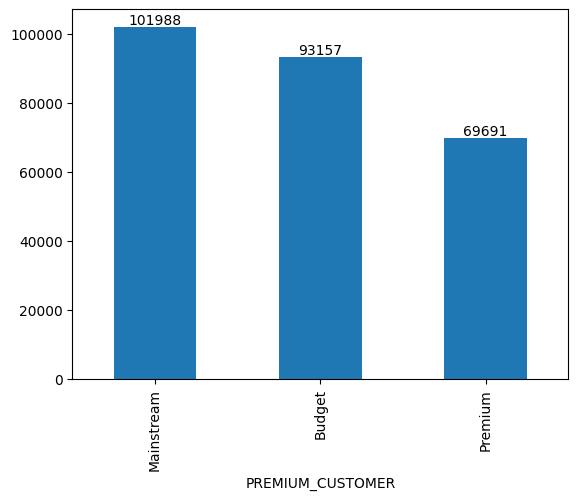

In [9]:
cx = Data['PREMIUM_CUSTOMER'].value_counts().plot(kind = 'bar')
for bar in cx.patches:
    height = bar.get_height()
    cx.text(bar.get_x() + bar.get_width()/2, height + 0.1, int(height),
            ha='center', va='bottom', fontsize=10, color='black')


<Axes: xlabel='PROD_Wt(in Grams)'>

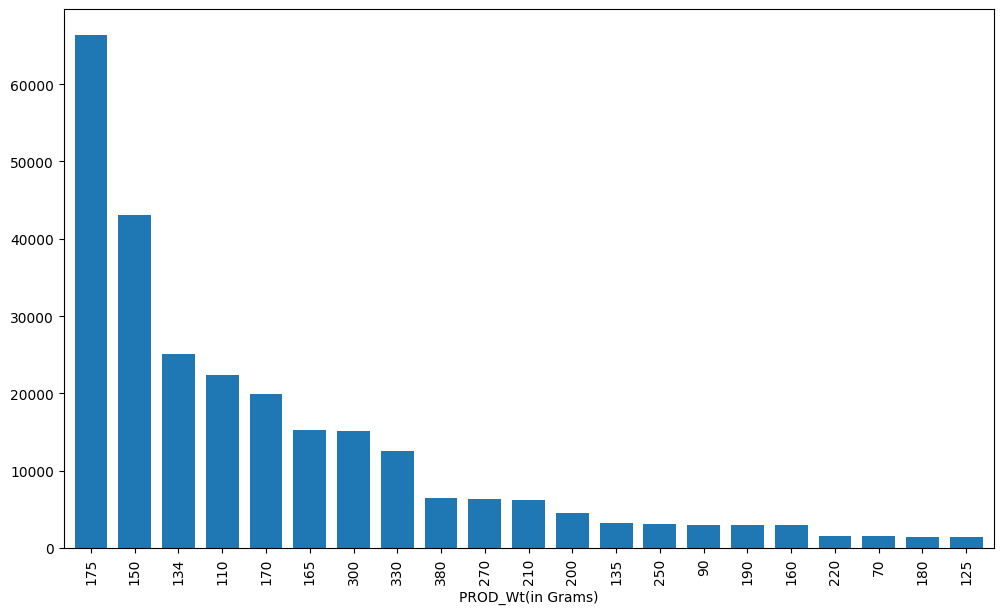

In [34]:
plt.figure(figsize = (12,7))
Data['PROD_Wt(in Grams)'].value_counts().sort_values(ascending = False).plot(kind = 'bar', width = 0.75 )


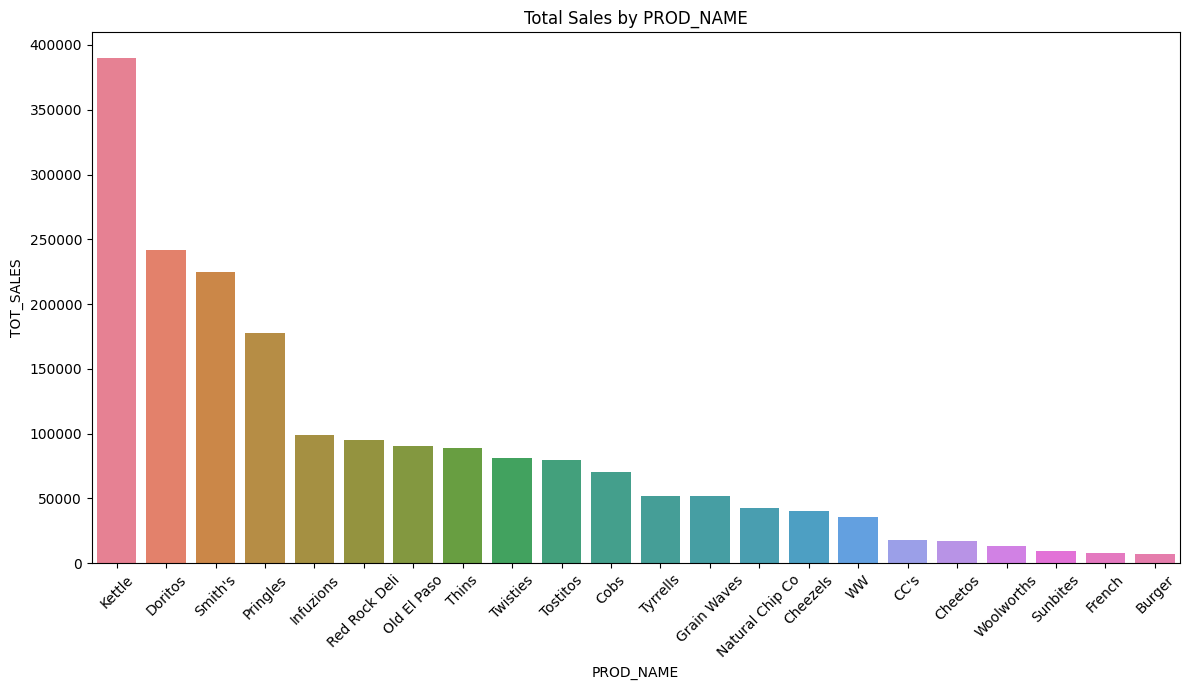

In [26]:
count_data = Data.groupby(['PROD_NAME'])['TOT_SALES'].sum().sort_values(ascending  = False).reset_index()


plt.figure(figsize=(12, 7))
sns.barplot(data=count_data, x='PROD_NAME', y='TOT_SALES', hue='PROD_NAME')
plt.title('Total Sales by PROD_NAME')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


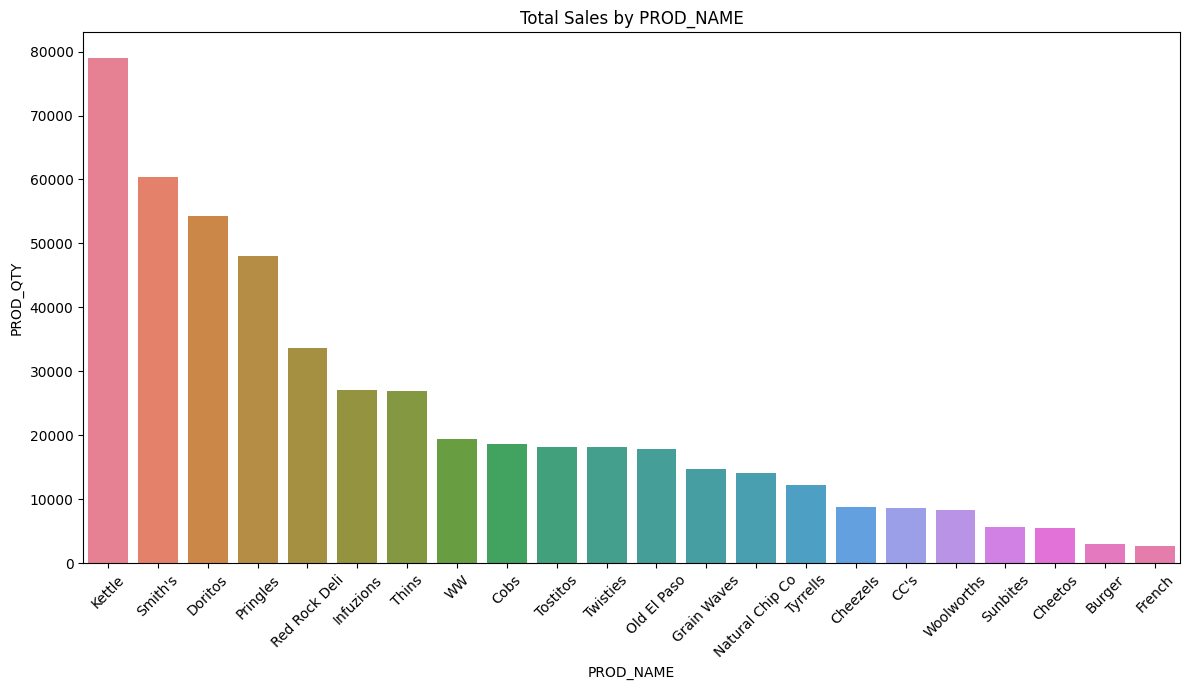

In [28]:
count_data = Data.groupby(['PROD_NAME'])['PROD_QTY'].sum().sort_values(ascending  = False).reset_index()


plt.figure(figsize=(12, 7))
sns.barplot(data=count_data, x='PROD_NAME', y='PROD_QTY', hue='PROD_NAME')
plt.title('Total Sales by PROD_NAME')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [12]:

Data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PREMIUM_CUSTOMER'].value_counts()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget               5020
                        Mainstream          11874
                        Premium              8216
NEW FAMILIES            Budget               3005
                        Mainstream           2325
                        Premium              1589
OLDER FAMILIES          Budget              23160
                        Mainstream          14244
                        Premium             11192
OLDER SINGLES/COUPLES   Budget              18407
                        Mainstream          18318
                        Premium             17754
RETIREES                Budget              15201
                        Mainstream          21466
                        Premium             13096
YOUNG FAMILIES          Budget              19122
                        Mainstream          12907
                        Premium             11563
YOUNG SINGLES/COUPLES   Budget               9242
         

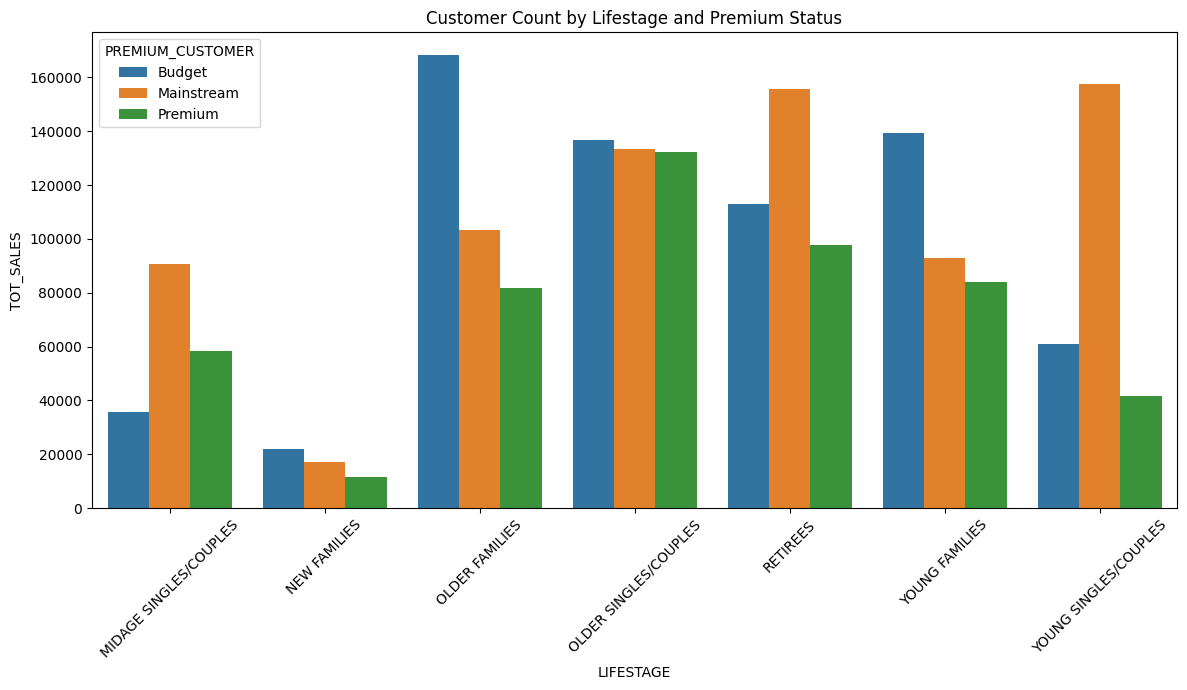

In [19]:
count_data = Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()


plt.figure(figsize=(12, 7))
sns.barplot(data=count_data, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Customer Count by Lifestage and Premium Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

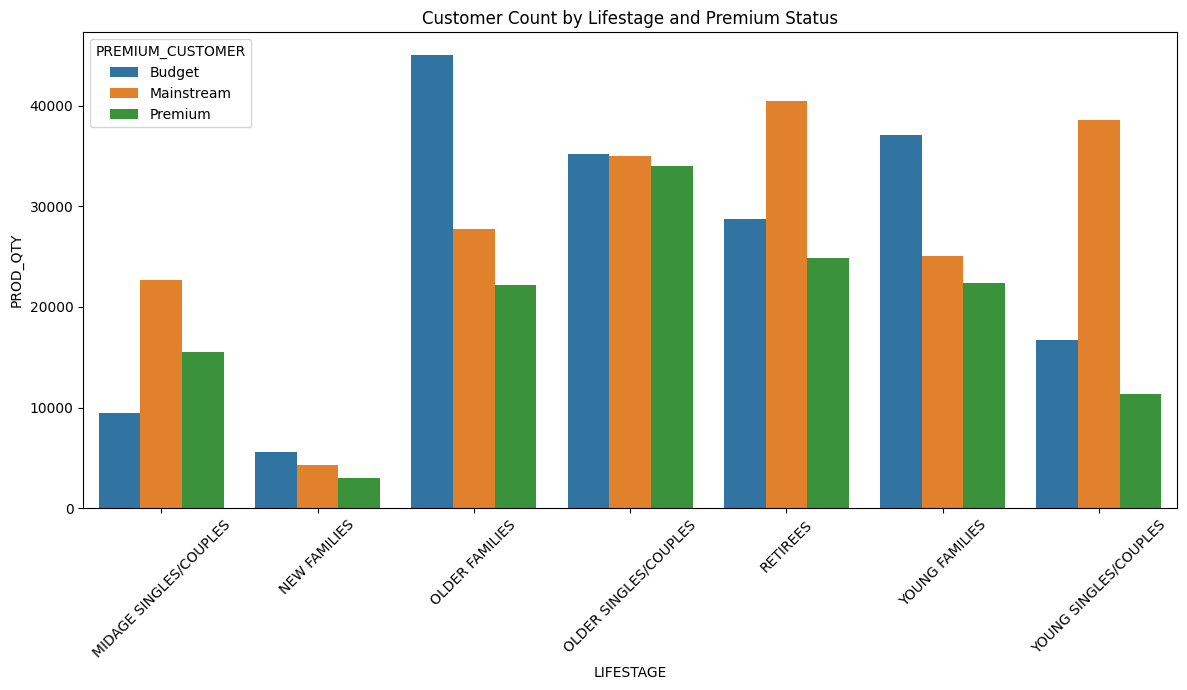

In [20]:

count_data = Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()


plt.figure(figsize=(12, 7))
sns.barplot(data=count_data, x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER')
plt.title('Customer Count by Lifestage and Premium Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [58]:
Data.groupby('PROD_QTY')['PROD_QTY'].value_counts()

PROD_QTY
1       27518
2      236039
3         430
4         397
5         450
200         2
Name: count, dtype: int64

In [68]:
 Data.groupby('STORE_NBR').agg({'PROD_QTY': 'sum' ,'LYLTY_CARD_NBR' : 'nunique'}).rename( columns = {'LYLTY_CARD_NBR':'Customers'}).sort_values(by = 'PROD_QTY',ascending = False).reset_index().head(10)    




,STORE_NBR,PROD_QTY,Customers
0,226,4401,382
1,88,3718,388
2,93,3639,264
3,165,3602,390
4,43,3519,251
5,237,3515,382
6,40,3499,388
7,230,3476,248
8,213,3470,256
9,58,3463,393


In [67]:

 Data.groupby('STORE_NBR').agg({'TOT_SALES': 'sum' ,'LYLTY_CARD_NBR' : 'nunique'}).rename( columns = {'LYLTY_CARD_NBR':'Customers'}).sort_values(by = 'TOT_SALES',ascending = False).reset_index().head(10)    



,STORE_NBR,TOT_SALES,Customers
0,226,18905.45,382
1,88,16333.25,388
2,165,15973.75,390
3,40,15559.50,388
4,237,15539.50,382
5,58,15251.45,393
6,199,14797.00,376
7,4,14647.65,379
8,203,14551.60,397
9,26,14469.30,377


In [65]:
#PROD_NBR	PROD_NAME	PROD_Type	PROD_Wt(in Grams)

Data.groupby(['PROD_NAME','PROD_Type','PROD_Wt(in Grams)','PROD_NBR'])['PROD_QTY'].value_counts().sort_values(ascending = False).reset_index().head(5)

,PROD_NAME,PROD_Type,PROD_Wt(in Grams),PROD_NBR,PROD_QTY,count
0,Kettle,MozzarellaBail&Peto,175,102,2,3004
1,Cobs,PopdSeaSalt,110,75,2,2979
2,Kettle,TortillaChpHny&JlpnoChili,150,108,2,2961
3,Cobs,PopdSwt/Chlli&Sr/Cream,110,33,2,2950
4,Tostitos,SplahOfLime,175,74,2,2936


In [70]:
#PROD_NBR	PROD_NAME	PROD_Type	PROD_Wt(in Grams)

Data.groupby(['PROD_NAME','PROD_Type','PROD_Wt(in Grams)','PROD_NBR'])['TOT_SALES'].sum().sort_values(ascending = False).reset_index().head(5)

,PROD_NAME,PROD_Type,PROD_Wt(in Grams),PROD_NBR,TOT_SALES
0,Doritos,ChpSupreme,380,4,40352.0
1,Smith's,CkleOrgnlBigBag,380,14,36367.6
2,Smith's,CrinkleSalt&Vinegar,330,16,34804.2
3,Kettle,MozzarellaBail&Peto,175,102,34457.4
4,Smith's,CrinkleOriginal,330,7,34302.6


In [22]:
# Data Analysis of Chips Sales

#From the given data,the most selling chips product_name :-  Kettle , Doritos and Smith's are the brands took top 3 sales and Quantity
# 175g, 150g are the most selling package in all categories
# Older singles/couples categories having high premium users, Older & Young families have more Budget category customers, Retires and young singles/
#couples shares more Mainstream customers
# Most customers buys the 2 chips packs 

# Total 272 stores according to store number

#STORE_NBR having high  quantity 226 with 4.4K and sales ~19K


#ToP selling products by Quantity
#1 Kettle    -	MozzarellaBail&Peto        -	175g	
#2	Cobs     -	PopdSeaSalt	               -    110g
#3	Kettle   -	TortillaChpHny&JlpnoChili  -    150g	
#4	Cobs     -	PopdSwt/Chlli&Sr/Cream	   -    110g	
#5	Tostitos -	SplahOfLime	               -    175g

#Top selling by Total sales

#1	Doritos	- ChpSupreme	      - 380g	- $ 40352.0
#2	Smith's	- CkleOrgnlBigBag	  - 380g	- $ 36367.6
#3	Smith's	- CrinkleSalt&Vinegar - 330g	- $ 34804.2
#4	Kettle	- MozzarellaBail&Peto - 175g	- $ 34457.4
#5	Smith's	- CrinkleOriginal	  - 330g	- $ 34302.6




In [71]:
#
#STORE_NBR	PROD_QTY	Customers_counts
#	226	      4401	      382
#	88	      3718	      388
#	93	      3639	      264
#	165	      3602	      390
#	43	      3519	      251
#	237	      3515	      382
#	40	      3499	      388
#	230	      3476	      248
#	213	      3470	      256
#	58	      3463	      393

